In [25]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key
from datetime import datetime

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e5f77411b443d6ecbdbadd21fad8856


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | massakory
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 4 of Set 1 | nizhnyaya tavda
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | kemin
Processing Record 7 of Set 1 | otane
Processing Record 8 of Set 1 | karnobat
Processing Record 9 of Set 1 | asau
Processing Record 10 of Set 1 | cabo san lucas
Processing Record 11 of Set 1 | vostok
Processing Record 12 of Set 1 | belaya gora
Processing Record 13 of Set 1 | chuy
Processing Record 14 of Set 1 | chokurdakh
Processing Record 15 of Set 1 | itarema
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | kodiak
Processing Record 18 of Set 1 | hobyo
Processing Record 19 of Set 1 | qaanaaq
Processing Record 20 of Set 1 | rocha
Processing Record 21 of Set 1 | pribelskiy
City not found. Skipping...
Processing Record 22 of 

Processing Record 37 of Set 4 | benjamin constant
Processing Record 38 of Set 4 | ciamis
Processing Record 39 of Set 4 | sigli
Processing Record 40 of Set 4 | myitkyina
Processing Record 41 of Set 4 | kruisfontein
Processing Record 42 of Set 4 | walvis bay
Processing Record 43 of Set 4 | broken hill
Processing Record 44 of Set 4 | salalah
Processing Record 45 of Set 4 | sola
Processing Record 46 of Set 4 | sudak
Processing Record 47 of Set 4 | beringovskiy
Processing Record 48 of Set 4 | san juan bautista
Processing Record 49 of Set 4 | faya
Processing Record 50 of Set 4 | samusu
City not found. Skipping...
Processing Record 1 of Set 5 | kon tum
Processing Record 2 of Set 5 | bilma
Processing Record 3 of Set 5 | warqla
City not found. Skipping...
Processing Record 4 of Set 5 | mahebourg
Processing Record 5 of Set 5 | aswan
Processing Record 6 of Set 5 | severnyy
Processing Record 7 of Set 5 | tuatapere
Processing Record 8 of Set 5 | tiksi
Processing Record 9 of Set 5 | emba
Processing 

Processing Record 24 of Set 8 | bogorodskoye
Processing Record 25 of Set 8 | turukhansk
Processing Record 26 of Set 8 | nambucca heads
Processing Record 27 of Set 8 | chengmai
City not found. Skipping...
Processing Record 28 of Set 8 | san vicente
Processing Record 29 of Set 8 | ruatoria
City not found. Skipping...
Processing Record 30 of Set 8 | filingue
Processing Record 31 of Set 8 | mkushi
Processing Record 32 of Set 8 | zhigansk
Processing Record 33 of Set 8 | katsuura
Processing Record 34 of Set 8 | riyadh
Processing Record 35 of Set 8 | mount gambier
Processing Record 36 of Set 8 | olinda
Processing Record 37 of Set 8 | itupiranga
Processing Record 38 of Set 8 | mayo
Processing Record 39 of Set 8 | sterling
Processing Record 40 of Set 8 | braganca
Processing Record 41 of Set 8 | marcona
City not found. Skipping...
Processing Record 42 of Set 8 | nanortalik
Processing Record 43 of Set 8 | berlevag
Processing Record 44 of Set 8 | juazeiro
Processing Record 45 of Set 8 | jurm
Proce

Processing Record 11 of Set 12 | port hedland
Processing Record 12 of Set 12 | qaqortoq
Processing Record 13 of Set 12 | port shepstone
Processing Record 14 of Set 12 | hailey
Processing Record 15 of Set 12 | tanout
Processing Record 16 of Set 12 | pemangkat
Processing Record 17 of Set 12 | amderma
City not found. Skipping...
Processing Record 18 of Set 12 | amparafaravola
Processing Record 19 of Set 12 | yanam
Processing Record 20 of Set 12 | salym
Processing Record 21 of Set 12 | jacareacanga
Processing Record 22 of Set 12 | hastings
Processing Record 23 of Set 12 | jiangyou
Processing Record 24 of Set 12 | tabou
Processing Record 25 of Set 12 | prainha
Processing Record 26 of Set 12 | maldonado
Processing Record 27 of Set 12 | koumac
Processing Record 28 of Set 12 | diego de almagro
Processing Record 29 of Set 12 | srandakan
Processing Record 30 of Set 12 | valley city
Processing Record 31 of Set 12 | liverpool
Processing Record 32 of Set 12 | camacari
Processing Record 33 of Set 12

In [26]:
len(city_data)

555

In [27]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Massakory,12.9960,15.7293,101.93,9,100,5.48,TD,2021-04-24 17:09:48
1,Port Alfred,-33.5906,26.8910,68.38,84,51,10.87,ZA,2021-04-24 17:09:49
2,Nizhnyaya Tavda,57.6731,66.1725,44.64,49,100,7.61,RU,2021-04-24 17:09:49
3,Punta Arenas,-53.1500,-70.9167,50.00,76,96,5.75,CL,2021-04-24 17:05:39
4,Kemin,42.7846,75.6892,50.02,40,100,4.70,KG,2021-04-24 17:09:49
5,Otane,-39.8833,176.6333,53.01,75,16,1.01,NZ,2021-04-24 17:09:50
6,Karnobat,42.6500,26.9833,57.20,87,75,10.36,BG,2021-04-24 17:09:50
7,Asau,46.4333,26.4000,50.00,42,90,2.91,RO,2021-04-24 17:06:40
8,Cabo San Lucas,22.8909,-109.9124,80.01,41,1,8.05,MX,2021-04-24 17:09:50
9,Vostok,46.4856,135.8833,29.70,49,60,10.80,RU,2021-04-24 17:09:51


In [35]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Massakory,TD,2021-04-24 17:09:48,12.9960,15.7293,101.93,9,100,5.48
1,Port Alfred,ZA,2021-04-24 17:09:49,-33.5906,26.8910,68.38,84,51,10.87
2,Nizhnyaya Tavda,RU,2021-04-24 17:09:49,57.6731,66.1725,44.64,49,100,7.61
3,Punta Arenas,CL,2021-04-24 17:05:39,-53.1500,-70.9167,50.00,76,96,5.75
4,Kemin,KG,2021-04-24 17:09:49,42.7846,75.6892,50.02,40,100,4.70
5,Otane,NZ,2021-04-24 17:09:50,-39.8833,176.6333,53.01,75,16,1.01
6,Karnobat,BG,2021-04-24 17:09:50,42.6500,26.9833,57.20,87,75,10.36
7,Asau,RO,2021-04-24 17:06:40,46.4333,26.4000,50.00,42,90,2.91
8,Cabo San Lucas,MX,2021-04-24 17:09:50,22.8909,-109.9124,80.01,41,1,8.05
9,Vostok,RU,2021-04-24 17:09:51,46.4856,135.8833,29.70,49,60,10.80


In [31]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [32]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

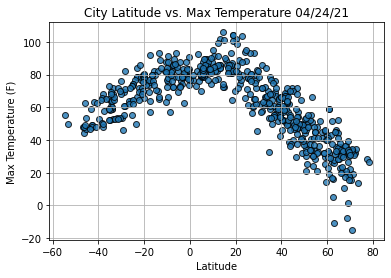

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

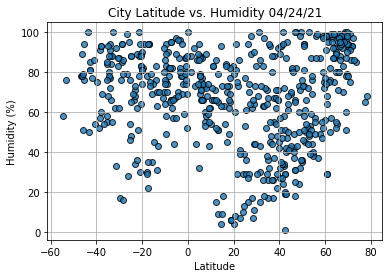

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

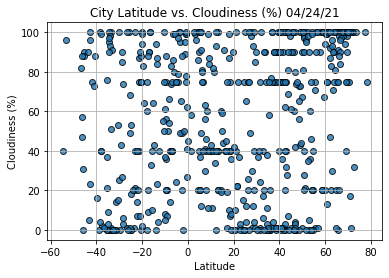

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

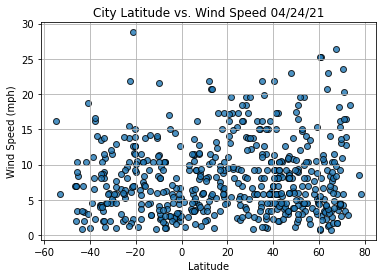

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [34]:
index13 = city_data_df.loc[13]
index13

City                      Itarema
Country                        BR
Date          2021-04-24 17:09:52
Lat                       -2.9248
Lng                      -39.9167
Max Temp                    83.41
Humidity                       78
Cloudiness                     65
Wind Speed                  14.47
Name: 13, dtype: object

In [36]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3      False
4       True
       ...  
550    False
551     True
552    False
553     True
554     True
Name: Lat, Length: 555, dtype: bool

In [37]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Massakory,TD,2021-04-24 17:09:48,12.9960,15.7293,101.93,9,100,5.48
2,Nizhnyaya Tavda,RU,2021-04-24 17:09:49,57.6731,66.1725,44.64,49,100,7.61
4,Kemin,KG,2021-04-24 17:09:49,42.7846,75.6892,50.02,40,100,4.70
6,Karnobat,BG,2021-04-24 17:09:50,42.6500,26.9833,57.20,87,75,10.36
7,Asau,RO,2021-04-24 17:06:40,46.4333,26.4000,50.00,42,90,2.91


In [38]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

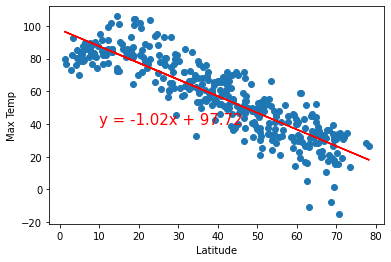

LinregressResult(slope=-1.0182449112148446, intercept=97.72494046911777, rvalue=-0.8793699614167474, pvalue=6.149876879777587e-122, stderr=0.028585317868452226)

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

# Run regression on hemisphere weather data.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)

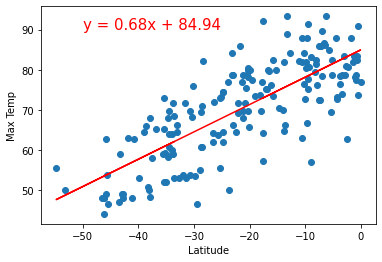

LinregressResult(slope=0.6817748217929599, intercept=84.94117654451449, rvalue=0.7706398210098584, pvalue=7.251833100613341e-37, stderr=0.04213928084579041)

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

# Run regression on hemisphere weather data.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)

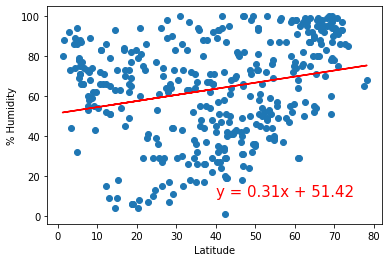

LinregressResult(slope=0.3061433315037525, intercept=51.42299307561964, rvalue=0.24425093709655984, pvalue=1.7497097383358023e-06, stderr=0.0630173145969423)

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

# Run regression on hemisphere weather data.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)

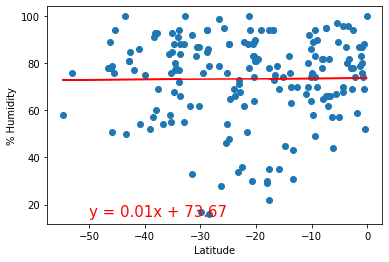

LinregressResult(slope=0.012984476326830906, intercept=73.66848483346759, rvalue=0.009775734204327953, pvalue=0.8960830468358618, stderr=0.09927223185647856)

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

# Run regression on hemisphere weather data.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)

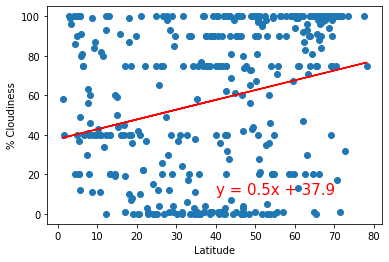

LinregressResult(slope=0.4952375567898232, intercept=37.89848160203141, rvalue=0.2627548223192787, pvalue=2.5324038085046625e-07, stderr=0.09428810235473781)

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

# Run regression on hemisphere weather data.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)

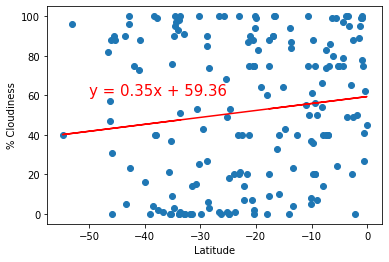

LinregressResult(slope=0.35085406593270374, intercept=59.35876981762289, rvalue=0.13317653323369644, pvalue=0.07389488850892886, stderr=0.1951580225826253)

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

# Run regression on hemisphere weather data.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)

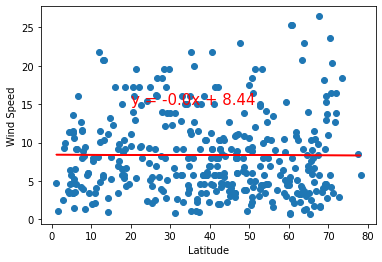

LinregressResult(slope=-0.0014842375869107975, intercept=8.438834239393307, rvalue=-0.00564872537511397, pvalue=0.9133005692590139, stderr=0.013623056744036088)

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(20,15))

# Run regression on hemisphere weather data.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)

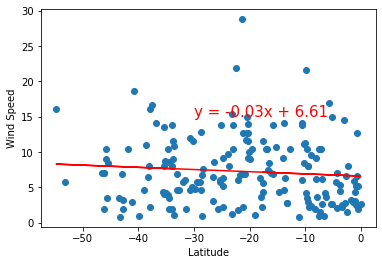

LinregressResult(slope=-0.030791227491201185, intercept=6.60674409794998, rvalue=-0.0893779850924922, pvalue=0.23149241012602806, stderr=0.025646511343054394)

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-30,15))

# Run regression on hemisphere weather data.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)